# Figure 4

**Figure 4.** Domain and time averages of shortwave, longwave, and net CRH. Profiles are shown for the (a) shallow cumulus, (b) WCB ascent, (c) WCB cyclonic outflow, and (d) WCB anticyclonic outflow regions. The ICON CRH is shown in dashed lines, and the CRH derived from the offline reference 1D radiative transfer calculation is shown in solid lines. Note the different x- and y-axes between panels (a) and (b-d).

---
@ Behrooz Keshtgar, KIT 2024

## 1- load python packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import colorlegend
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.colors as mcolors
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")

For reference, print package versions to screen:

In [2]:
print('xarrary:   ', xr.__version__)
print('numpy:     ', np.__version__)
import matplotlib; print('matplotlib:', matplotlib.__version__); del matplotlib

xarrary:    0.16.0
numpy:      1.23.5
matplotlib: 3.3.0


**Since datasets are large, I use DASK to speed up my analysis**

In [3]:
import dask
from dask.distributed import Client, progress, wait
dask.config.config.get('distributed').get('dashboard').update({'link':'{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status'})
client = Client()
client

<Client: 'tcp://127.0.0.1:39473' processes=16 threads=256, memory=252.72 GB>

## 2- Loading datasets

In [4]:
 # Dictionary for loading datasets for the 4 simulations
domdict = {
         'shallow_cumulus'          : {'res':'300m'}, 
         'WCB_ascent'               : {'res':'300m'}, 
         'WCB_cyclonic_outflow'     : {'res':'300m'}, 
         'WCB_anticyclonic_outflow' : {'res':'300m'}
          }

In [5]:
# Loading icon-pp datasets
def load_data():
    list_icon = []
    for dom in list(domdict.keys()):
        path = '/work/bb1135/b381185/icon_output/data_for_crh_unc_paper/postprocessed_data_for_publication/'
        print('Working on loading data for', dom)
        ds = xr.open_dataset(path+dom+'/icon_pp_data.nc').chunk(chunks={'time': 1, 'height': 10})
        list_icon.append(ds)
    return list_icon
#-------------------------------------------------------------------------------------------------
list_icon=load_data()

Working on loading data for shallow_cumulus
Working on loading data for WCB_ascent
Working on loading data for WCB_cyclonic_outflow
Working on loading data for WCB_anticyclonic_outflow


In [6]:
# Loading icon-pp datasets
def load_data():
    list_icon = []
    for dom in list(domdict.keys()):
        path = '/work/bb1135/b381185/icon_output/data_for_crh_unc_paper/postprocessed_data_for_publication/'
        print('Working on loading data for', dom)
        ds = xr.open_dataset(path+dom+'/libradtran_pp_twostr_Fu.nc').chunk(chunks={'time': 1, 'height': 10})
        list_icon.append(ds)
    return list_icon
#-------------------------------------------------------------------------------------------------
list_libradtran=load_data()

Working on loading data for shallow_cumulus
Working on loading data for WCB_ascent
Working on loading data for WCB_cyclonic_outflow
Working on loading data for WCB_anticyclonic_outflow


## 3- Average profiles of CRH

In [7]:
# excluding boundaries and takin domain average
# icon & libradtran datasets
for dom in range(len(list_icon)):
    for var in ['lwcrh','swcrh']:
        list_icon[dom][var+'_mean'] = list_icon[dom][var].isel(lon=slice(10,list_icon[dom].lon.size-10),lat=slice(5,list_icon[dom].lat.size-5)).mean(dim=['lat','lon','time']).compute()
        list_libradtran[dom][var+'_mean'] = list_libradtran[dom][var].isel(lon=slice(10,list_libradtran[dom].lon.size-10),lat=slice(5,list_libradtran[dom].lat.size-5)).mean(dim=['lat','lon','time']).compute()

### For data publication

In [13]:
# creating a dataset and save for data publication
ds_out = xr.Dataset(
    data_vars={
        "swcrh_mean_libradtran_dom01"  : (list_libradtran[0]['swcrh_mean'].dims, list_libradtran[0]['swcrh_mean'].data),
        "lwcrh_mean_libradtran_dom01"  : (list_libradtran[0]['lwcrh_mean'].dims, list_libradtran[0]['lwcrh_mean'].data),
        "swcrh_mean_icon_dom01"        : (list_icon[0]['swcrh_mean'].dims, list_icon[0]['swcrh_mean'].data),
        "lwcrh_mean_icon_dom01"        : (list_icon[0]['lwcrh_mean'].dims, list_icon[0]['lwcrh_mean'].data),
        
        "swcrh_mean_libradtran_dom02"  : (list_libradtran[1]['swcrh_mean'].dims, list_libradtran[1]['swcrh_mean'].data),
        "lwcrh_mean_libradtran_dom02"  : (list_libradtran[1]['lwcrh_mean'].dims, list_libradtran[1]['lwcrh_mean'].data),
        "swcrh_mean_icon_dom02"        : (list_icon[1]['swcrh_mean'].dims, list_icon[1]['swcrh_mean'].data),
        "lwcrh_mean_icon_dom02"        : (list_icon[1]['lwcrh_mean'].dims, list_icon[1]['lwcrh_mean'].data),
        
        "swcrh_mean_libradtran_dom03"  : (list_libradtran[2]['swcrh_mean'].dims, list_libradtran[2]['swcrh_mean'].data),
        "lwcrh_mean_libradtran_dom03"  : (list_libradtran[2]['lwcrh_mean'].dims, list_libradtran[2]['lwcrh_mean'].data),
        "swcrh_mean_icon_dom03"        : (list_icon[2]['swcrh_mean'].dims, list_icon[2]['swcrh_mean'].data),
        "lwcrh_mean_icon_dom03"        : (list_icon[2]['lwcrh_mean'].dims, list_icon[2]['lwcrh_mean'].data),
        
        "swcrh_mean_libradtran_dom04"  : (list_libradtran[3]['swcrh_mean'].dims, list_libradtran[3]['swcrh_mean'].data),
        "lwcrh_mean_libradtran_dom04"  : (list_libradtran[3]['lwcrh_mean'].dims, list_libradtran[3]['lwcrh_mean'].data),
        "swcrh_mean_icon_dom04"        : (list_icon[3]['swcrh_mean'].dims, list_icon[3]['swcrh_mean'].data),
        "lwcrh_mean_icon_dom04"        : (list_icon[3]['lwcrh_mean'].dims, list_icon[3]['lwcrh_mean'].data),       
    },
    coords=list_libradtran[0]['swcrh_mean'].coords)
ds_out = ds_out.assign(z_mc=list_libradtran[0]['z_mc'])

ds_out.attrs['description'] = 'Vertical profiles of CRH from icon simulations and offline radiation calculation for each LEM domain'
ds_out.to_netcdf('/work/bb1135/b381185/icon_output/data_for_crh_unc_paper/postprocessed_data_for_publication/for_publication/figure4.nc')

In [ ]:
# ds_out = xr.open_dataset('/work/bb1135/b381185/icon_output/data_for_crh_unc_paper/postprocessed_data_for_publication/for_publication/figure4.nc')

## 4- Plot

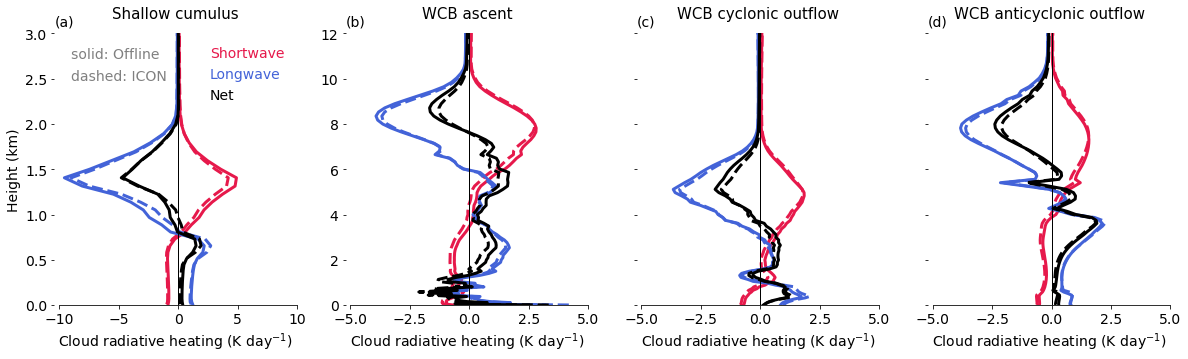

In [12]:
# plot
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
i = 0

z = ds_out['z_mc']

for ax in axes.flat:
    ax.tick_params(labelsize=14)
    
    if i == 0:
        ax.spines['top'].set_color('none')
        ax.spines['right'].set_color('none')
        ax.spines['left'].set_color('none')
        
        ax.plot(ds_out['swcrh_mean_libradtran_dom01'],z,color='#e6194B',label='Shortwave',lw=3)
        ax.plot(ds_out['swcrh_mean_icon_dom01'],z,color='#e6194B',linestyle='dashed',lw=3)
        
        ax.plot(ds_out['lwcrh_mean_libradtran_dom01'],z,color='#4363d8',label='Longwave',lw=3)
        ax.plot(ds_out['lwcrh_mean_icon_dom01'],z,color='#4363d8',linestyle='dashed',lw=3)
        
        icon_ntcrh = ds_out['swcrh_mean_icon_dom01'] + ds_out['lwcrh_mean_icon_dom01']
        libradtran_ntcrh = ds_out['swcrh_mean_libradtran_dom01'] + ds_out['lwcrh_mean_libradtran_dom01']
        
        ax.plot(libradtran_ntcrh,z,color='#000000',label='Net',lw=3)
        ax.plot(icon_ntcrh,z,color='#000000',linestyle='dashed',lw=3)
        
        ax.axvline(x=0, ymin=0.0, ymax=1,c='black', lw=1)
        ax.set_xlabel('Cloud radiative heating (K day$^{-1}$)', fontsize=14)#,labelpad=10)
        ax.set_ylabel('Height (km)', fontsize=14)
        #ax.set_yticklabels([])
        ax.text(0.0, 1.03, '(a)', transform=ax.transAxes, 
            size=14)
        
        ax.spines['bottom'].set_bounds(-10,10)
        ax.set_xticks(np.linspace(-10,10,5))
        ax.set_xlim([-10.4,10])
        
        lg=colorlegend.color_legend(ax,loc=1,fsize=14)
        ax.set_title('Shallow cumulus', fontsize=15,pad=15)
        ax.set_ylim([0,3])
        
        ax.text(-9, 2.85, "solid: Offline", color="gray", size=14, va="top")
        ax.text(-9, 2.6, "dashed: ICON", color="gray", size=14, va="top")
        
    
    if i == 1:
        ax.spines['top'].set_color('none')
        ax.spines['right'].set_color('none')
        ax.spines['left'].set_color('none')
        
        ax.plot(ds_out['swcrh_mean_libradtran_dom02'],z,color='#e6194B',label='Shortwave',lw=3)
        ax.plot(ds_out['swcrh_mean_icon_dom02'],z,color='#e6194B',linestyle='dashed',lw=3)
        
        ax.plot(ds_out['lwcrh_mean_libradtran_dom02'],z,color='#4363d8',label='Longwave',lw=3)
        ax.plot(ds_out['lwcrh_mean_icon_dom02'],z,color='#4363d8',linestyle='dashed',lw=3)
        
        icon_ntcrh = ds_out['swcrh_mean_icon_dom02'] + ds_out['lwcrh_mean_icon_dom02']
        libradtran_ntcrh = ds_out['swcrh_mean_libradtran_dom02'] + ds_out['lwcrh_mean_libradtran_dom02']
        
        ax.plot(libradtran_ntcrh,z,color='#000000',label='Net',lw=3)
        ax.plot(icon_ntcrh,z,color='#000000',linestyle='dashed',lw=3)
        
        ax.axvline(x=0, ymin=0.0, ymax=1,c='black', lw=1)
        ax.set_xlabel('Cloud radiative heating (K day$^{-1}$)', fontsize=14)#,labelpad=10)
        #ax.set_ylabel('Height (km)', fontsize=14)
        #ax.set_yticklabels([])
        ax.text(0.0, 1.03, '(b)', transform=ax.transAxes, 
            size=14)
        
        ax.spines['bottom'].set_bounds(-5,5)
        ax.set_xticks(np.linspace(-5,5,5))
        ax.set_xlim([-5.2,5])
        
        #lg=colorlegend.color_legend(ax,loc=1,fsize=14)
        ax.set_title('WCB ascent', fontsize=15,pad=15)
        ax.set_ylim([0,12])
        
    if i == 2:
        
        ax.spines['top'].set_color('none')
        ax.spines['right'].set_color('none')
        ax.spines['left'].set_color('none')
        
        ax.plot(ds_out['swcrh_mean_libradtran_dom03'],z,color='#e6194B',label='Shortwave',lw=3)
        ax.plot(ds_out['swcrh_mean_icon_dom03'],z,color='#e6194B',linestyle='dashed',lw=3)
        
        ax.plot(ds_out['lwcrh_mean_libradtran_dom03'],z,color='#4363d8',label='Longwave',lw=3)
        ax.plot(ds_out['lwcrh_mean_icon_dom03'],z,color='#4363d8',linestyle='dashed',lw=3)
        
        icon_ntcrh = ds_out['swcrh_mean_icon_dom03'] + ds_out['lwcrh_mean_icon_dom03']
        libradtran_ntcrh = ds_out['swcrh_mean_libradtran_dom03'] + ds_out['lwcrh_mean_libradtran_dom03']
        
        ax.plot(libradtran_ntcrh,z,color='#000000',label='Net',lw=3)
        ax.plot(icon_ntcrh,z,color='#000000',linestyle='dashed',lw=3)
        
        ax.axvline(x=0, ymin=0.0, ymax=1,c='black', lw=1)
        ax.set_xlabel('Cloud radiative heating (K day$^{-1}$)', fontsize=14)#,labelpad=10)
        #ax.set_ylabel('Height (km)', fontsize=14)
        ax.set_yticklabels([])
        ax.text(0.0, 1.03, '(c)', transform=ax.transAxes, 
            size=14)
        
        ax.spines['bottom'].set_bounds(-5,5)
        ax.set_xticks(np.linspace(-5,5,5))
        ax.set_xlim([-5.2,5])
        
        #lg=colorlegend.color_legend(ax,loc=5,fsize=11)
        ax.set_title('WCB cyclonic outflow', fontsize=15,pad=15)
        ax.set_ylim([0,12])
        
    if i == 3:
        
        ax.spines['top'].set_color('none')
        ax.spines['right'].set_color('none')
        ax.spines['left'].set_color('none')
        
        ax.plot(ds_out['swcrh_mean_libradtran_dom04'],z,color='#e6194B',label='Shortwave',lw=3)
        ax.plot(ds_out['swcrh_mean_icon_dom04'],z,color='#e6194B',linestyle='dashed',lw=3)
        
        ax.plot(ds_out['lwcrh_mean_libradtran_dom04'],z,color='#4363d8',label='Longwave',lw=3)
        ax.plot(ds_out['lwcrh_mean_icon_dom04'],z,color='#4363d8',linestyle='dashed',lw=3)
        
        icon_ntcrh = ds_out['swcrh_mean_icon_dom04'] + ds_out['lwcrh_mean_icon_dom04']
        libradtran_ntcrh = ds_out['swcrh_mean_libradtran_dom04'] + ds_out['lwcrh_mean_libradtran_dom04']
        
        ax.plot(libradtran_ntcrh,z,color='#000000',label='Net',lw=3)
        ax.plot(icon_ntcrh,z,color='#000000',linestyle='dashed',lw=3)
        
        ax.axvline(x=0, ymin=0.0, ymax=1,c='black', lw=1)
        ax.set_xlabel('Cloud radiative heating (K day$^{-1}$)', fontsize=14)#,labelpad=10)
        #ax.set_ylabel('Height (km)', fontsize=14)
        ax.set_yticklabels([])
        ax.text(0.0, 1.03, '(d)', transform=ax.transAxes, 
            size=14)
        
        ax.spines['bottom'].set_bounds(-5,5)
        ax.set_xticks(np.linspace(-5,5,5))
        ax.set_xlim([-5.2,5])
        
        #lg=colorlegend.color_legend(ax,loc=5,fsize=11)
        ax.set_title('WCB anticyclonic outflow', fontsize=15,pad=15)
        ax.set_ylim([0,12])    
        
    i = i + 1    
    
fig.subplots_adjust(wspace=0.2,hspace=0.35) 
#plt.savefig('figure4.pdf', bbox_inches = 'tight')
#plt.savefig('figure4.png', bbox_inches = 'tight',dpi=300)

In [14]:
client.close()